<a href="https://colab.research.google.com/github/DristantaNirola/EDA-AirBnB_BOOKING_ANALYSIS/blob/main/EDA_AirBnB_BOOKING_ANALYSIS.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#### EDA-AirBnB_BOOKING_ANALYSIS:

Since 2008, guests and hosts have used Airbnb to expand on traveling possibilities and present a more unique, personalized way of experiencing the world. Today, Airbnb became one of a kind service that is used and recognized by the whole world. Data analysis on millions of listings provided through Airbnb is a crucial factor for the company. These millions of listings generate a lot of data - data that can be analyzed and used for security, business decisions, understanding of customers' and providers' (hosts) behavior and performance on the platform, guiding marketing initiatives, implementation of innovative additional services and much more.

#### Objective -
Explore and analyze the data to discover key understandings (not limited to these) such as :  
What can we learn about different hosts and areas?  
What can we learn from predictions? (ex: locations, prices, reviews, etc)  
Which hosts are the busiest and why?  
Is there any noticeable difference of traffic among different areas and what could be the reason for it?  


### Dataset overview:
id - It contains the unique id of the listings.  
name - It contains the description of the listing. The more beautiful and attractive the name is the more people it attract.  
host_id - It contains unique host_id related to every host_name.  
host_name -It contains host name of the respective hosts.  
neighbourhood_group - It contains five neighbourhood groups of NewYork city.  
neighbourhood - It contains the sub part of neighbouhood group.  
latitude - It contains latitudes of the listed location.  
longitude -It contains longitudes of the listed location.  
room_type - It is a categorical column which contains the room types of the listings.  
price - It contains prices of the listings.  
minimum_nights - It restricts the minimum number of nights for booking.  
number_of_reviews - It contains the number of reviews of that particular listing.  
last_review - It contains the last review date of that listing.  
reviews_per_month - It contains the number of reviews received per month by that listing.  
calculated_host_listings_count - It contains the total number of listings one particular host has.  
availability_365 - It reflects the current availability of the listing in a year.  

##Mounting the drive

In [3]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


##Importing Libraries

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

##Loading the data set

In [34]:
# Define the path where data is kept
dir_path = '/content/drive/MyDrive/AlmaBetter/Cohort Nilgiri/Module 1/Capstone_Project-AirBnB_Booking_analysis/Airbnb NYC 2019.csv'

In [6]:
# Importing the .csv file for the drive
airbnb_df= pd.read_csv(dir_path)
airbnb_df.head()

,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365
0,2539,Clean & quiet apt home by the park,2787,John,Brooklyn,Kensington,40.64749,-73.97237,Private room,149,1,9,2018-10-19,0.21,6,365
1,2595,Skylit Midtown Castle,2845,Jennifer,Manhattan,Midtown,40.75362,-73.98377,Entire home/apt,225,1,45,2019-05-21,0.38,2,355
2,3647,THE VILLAGE OF HARLEM....NEW YORK !,4632,Elisabeth,Manhattan,Harlem,40.80902,-73.94190,Private room,150,3,0,NaN,NaN,1,365
3,3831,Cozy Entire Floor of Brownstone,4869,LisaRoxanne,Brooklyn,Clinton Hill,40.68514,-73.95976,Entire home/apt,89,1,270,2019-07-05,4.64,1,194
4,5022,Entire Apt: Spacious Studio/Loft by central park,7192,Laura,Manhattan,East Harlem,40.79851,-73.94399,Entire home/apt,80,10,9,2018-11-19,0.10,1,0


##Exploring the data

In [35]:
#checking the shape of airbnb_df
airbnb_df.shape

(48895, 16)

In [7]:
# Data infomation: column, non-null counts and Data Type
airbnb_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 48895 entries, 0 to 48894
Data columns (total 16 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   id                              48895 non-null  int64  
 1   name                            48879 non-null  object 
 2   host_id                         48895 non-null  int64  
 3   host_name                       48874 non-null  object 
 4   neighbourhood_group             48895 non-null  object 
 5   neighbourhood                   48895 non-null  object 
 6   latitude                        48895 non-null  float64
 7   longitude                       48895 non-null  float64
 8   room_type                       48895 non-null  object 
 9   price                           48895 non-null  int64  
 10  minimum_nights                  48895 non-null  int64  
 11  number_of_reviews               48895 non-null  int64  
 12  last_review                     

### Imputing the missing values

In [36]:
# Null value counts
airbnb_df.isna().sum()

id                                    0
name                                 16
host_id                               0
host_name                            21
neighbourhood_group                   0
neighbourhood                         0
latitude                              0
longitude                             0
room_type                             0
price                                 0
minimum_nights                        0
number_of_reviews                     0
last_review                       10052
reviews_per_month                 10052
calculated_host_listings_count        0
availability_365                      0
dtype: int64

In [8]:
airbnb_df[airbnb_df['name'].isna()]

,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365
2854,1615764,NaN,6676776,Peter,Manhattan,Battery Park City,40.71239,-74.01620,Entire home/apt,400,1000,0,NaN,NaN,1,362
3703,2232600,NaN,11395220,Anna,Manhattan,East Village,40.73215,-73.98821,Entire home/apt,200,1,28,2015-06-08,0.45,1,341
5775,4209595,NaN,20700823,Jesse,Manhattan,Greenwich Village,40.73473,-73.99244,Entire home/apt,225,1,1,2015-01-01,0.02,1,0
5975,4370230,NaN,22686810,Michaël,Manhattan,Nolita,40.72046,-73.99550,Entire home/apt,215,7,5,2016-01-02,0.09,1,0
6269,4581788,NaN,21600904,Lucie,Brooklyn,Williamsburg,40.71370,-73.94378,Private room,150,1,0,NaN,NaN,1,0
6567,4756856,NaN,1832442,Carolina,Brooklyn,Bushwick,40.70046,-73.92825,Private room,70,1,0,NaN,NaN,1,0
6605,4774658,NaN,24625694,Josh,Manhattan,Washington Heights,40.85198,-73.93108,Private room,40,1,0,NaN,NaN,1,0
8841,6782407,NaN,31147528,Huei-Yin,Brooklyn,Williamsburg,40.71354,-73.93882,Private room,45,1,0,NaN,NaN,1,0
11963,9325951,NaN,33377685,Jonathan,Manhattan,Hell's Kitchen,40.76436,-73.98573,Entire home/apt,190,4,1,2016-01-05,0.02,1,0
12824,9787590,NaN,50448556,Miguel,Manhattan,Harlem,40.80316,-73.95189,Entire home/apt,300,5,0,NaN,NaN,5,0


Some of the values in the name column is NaN but we can find that the property actully exist as all the NaN property name has a valid host name, location, reviews and other features wich are not null so we are not removing the rows with the nan name features.

In [9]:
airbnb_df[['number_of_reviews','reviews_per_month']].fillna(0,inplace=True)

/usr/local/lib/python3.7/dist-packages/pandas/core/frame.py:4327: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  downcast=downcast,


In [6]:
airbnb_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 48895 entries, 0 to 48894
Data columns (total 16 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   id                              48895 non-null  int64  
 1   name                            48879 non-null  object 
 2   host_id                         48895 non-null  int64  
 3   host_name                       48874 non-null  object 
 4   neighbourhood_group             48895 non-null  object 
 5   neighbourhood                   48895 non-null  object 
 6   latitude                        48895 non-null  float64
 7   longitude                       48895 non-null  float64
 8   room_type                       48895 non-null  object 
 9   price                           48895 non-null  int64  
 10  minimum_nights                  48895 non-null  int64  
 11  number_of_reviews               48895 non-null  int64  
 12  last_review                     

In [ ]:
airbnb_df[airbnb_df['host_name'].isna()].head()

,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365
360,100184,Bienvenue,526653,NaN,Queens,Queens Village,40.72413,-73.76133,Private room,50,1,43,2019-07-08,0.45,1,88
2700,1449546,Cozy Studio in Flatbush,7779204,NaN,Brooklyn,Flatbush,40.64965,-73.96154,Entire home/apt,100,30,49,2017-01-02,0.69,1,342
5745,4183989,SPRING in the City!! Zen-Style Tranquil Bedroom,919218,NaN,Manhattan,Harlem,40.80606,-73.95061,Private room,86,3,34,2019-05-23,1.00,1,359
6075,4446862,Charming Room in Prospect Heights!,23077718,NaN,Brooklyn,Crown Heights,40.67512,-73.96146,Private room,50,1,0,NaN,NaN,1,0
6582,4763327,"Luxurious, best location, spa inc'l",24576978,NaN,Brooklyn,Greenpoint,40.72035,-73.95355,Entire home/apt,195,1,1,2015-10-20,0.02,1,0


In [ ]:
# checking if the availabality_365 has zero vales in the dataframe
airbnb_df[airbnb_df['availability_365']==0]

,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365
4,5022,Entire Apt: Spacious Studio/Loft by central park,7192,Laura,Manhattan,East Harlem,40.79851,-73.94399,Entire home/apt,80,10,9,2018-11-19,0.10,1,0
6,5121,BlissArtsSpace!,7356,Garon,Brooklyn,Bedford-Stuyvesant,40.68688,-73.95596,Private room,60,45,49,2017-10-05,0.40,1,0
8,5203,Cozy Clean Guest Room - Family Apt,7490,MaryEllen,Manhattan,Upper West Side,40.80178,-73.96723,Private room,79,2,118,2017-07-21,0.99,1,0
14,6090,West Village Nest - Superhost,11975,Alina,Manhattan,West Village,40.73530,-74.00525,Entire home/apt,120,90,27,2018-10-31,0.22,1,0
20,7801,Sweet and Spacious Brooklyn Loft,21207,Chaya,Brooklyn,Williamsburg,40.71842,-73.95718,Entire home/apt,299,3,9,2011-12-28,0.07,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
48550,36313048,Sunny room with private entrance in shared home,16883913,Tiffany,Queens,Ridgewood,40.69919,-73.89902,Private room,45,1,0,NaN,NaN,1,0
48731,36410519,Sunlight charming apt. in the heart of Brooklyn,121384174,Luciana Paula,Brooklyn,Park Slope,40.66716,-73.98101,Entire home/apt,111,8,0,NaN,NaN,1,0
48756,36419441,Murray Hill Masterpiece,273824202,David,Manhattan,Murray Hill,40.74404,-73.97239,Entire home/apt,129,2,0,NaN,NaN,1,0
48760,36420725,"Sunnyside, Queens 15 Mins to Midtown Clean & C...",19990280,Brandon,Queens,Sunnyside,40.74719,-73.91919,Private room,46,1,0,NaN,NaN,1,0


In [10]:
# Taking a sub dataframe where the properties are available.
available_property_df= airbnb_df[airbnb_df['availability_365']!=0]
closed_property_df= airbnb_df[airbnb_df['availability_365']==0]

## Conclusion: Availabality_365 has a zero value indicates that their are around 17533 properties that are current not in operation. We can perform further analysis on this dataset. Thus we can divide the dataset based on the availabality_365 and perform the analysis.

In [ ]:
len(airbnb_df['host_name'].unique())

11453

In [ ]:
len(airbnb_df['host_id'].unique())

37457

In [ ]:
# chhacking all the propertise registared by host name john
airbnb_df[airbnb_df['host_name']=='John']

,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365
0,2539,Clean & quiet apt home by the park,2787,John,Brooklyn,Kensington,40.64749,-73.97237,Private room,149,1,9,2018-10-19,0.21,6,365
429,148201,NYC - Sunny Greenwich Village 1br,715807,John,Manhattan,Greenwich Village,40.72831,-74.00177,Entire home/apt,175,3,18,2013-05-31,0.19,1,0
620,234870,Private Room With GREAT Location,1229984,John,Queens,Long Island City,40.74581,-73.95295,Private room,75,30,65,2017-07-31,0.74,3,219
991,400039,Big Beautiful Railroad in Brooklyn,1488809,John,Brooklyn,Bushwick,40.70339,-73.92945,Entire home/apt,130,30,53,2017-06-30,0.68,1,0
1141,484297,Large home in most desirable Brooklyn hood!,2397411,John,Brooklyn,Clinton Hill,40.68545,-73.96534,Entire home/apt,350,4,10,2018-09-12,0.12,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
47624,35836317,Gorgeous Duplex 2BED/1.5BA Modern,269242923,John,Manhattan,Kips Bay,40.74490,-73.97888,Entire home/apt,288,5,2,2019-06-30,2.00,1,74
47689,35871036,Huge 1 bedroom w/ a backyard near the heart of...,226414996,John,Queens,Ditmars Steinway,40.77170,-73.90799,Entire home/apt,90,3,0,NaN,NaN,2,21
47915,35984474,Perfect Weekend Stay,229739739,John,Brooklyn,Flatbush,40.64726,-73.95455,Private room,85,14,0,NaN,NaN,2,176
48212,36140542,Wonderful Summer Vacation Getaways For Weeken...,229739739,John,Brooklyn,Flatbush,40.64600,-73.95455,Private room,85,7,0,NaN,NaN,2,176


In [ ]:
airbnb_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 48895 entries, 0 to 48894
Data columns (total 16 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   id                              48895 non-null  int64  
 1   name                            48879 non-null  object 
 2   host_id                         48895 non-null  int64  
 3   host_name                       48874 non-null  object 
 4   neighbourhood_group             48895 non-null  object 
 5   neighbourhood                   48895 non-null  object 
 6   latitude                        48895 non-null  float64
 7   longitude                       48895 non-null  float64
 8   room_type                       48895 non-null  object 
 9   price                           48895 non-null  int64  
 10  minimum_nights                  48895 non-null  int64  
 11  number_of_reviews               48895 non-null  int64  
 12  last_review                     

In [ ]:
airbnb_df.isna().sum()

id                                    0
name                                 16
host_id                               0
host_name                            21
neighbourhood_group                   0
neighbourhood                         0
latitude                              0
longitude                             0
room_type                             0
price                                 0
minimum_nights                        0
number_of_reviews                     0
last_review                       10052
reviews_per_month                 10052
calculated_host_listings_count        0
availability_365                      0
dtype: int64

### conclusion: There are total of 11453 unique host in the dataset and the same host is having different host id for different appartment registared at the airbnb 

## Exploring Neighbourhood grop column 

In [18]:
len(airbnb_df['neighbourhood_group'].unique())

5

### checking the distribution of the numeric features

In [19]:
airbnb_df.columns

Index(['id', 'name', 'host_id', 'host_name', 'neighbourhood_group',
       'neighbourhood', 'latitude', 'longitude', 'room_type', 'price',
       'minimum_nights', 'number_of_reviews', 'last_review',
       'reviews_per_month', 'calculated_host_listings_count',
       'availability_365'],
      dtype='object')

In [25]:
numeric_features=[ 'price','minimum_nights', 'number_of_reviews','reviews_per_month', 'calculated_host_listings_count',
       'availability_365']

In [26]:
# considering all the numeric values for histogram plot
airbnbsub = airbnb_df[numeric_features]


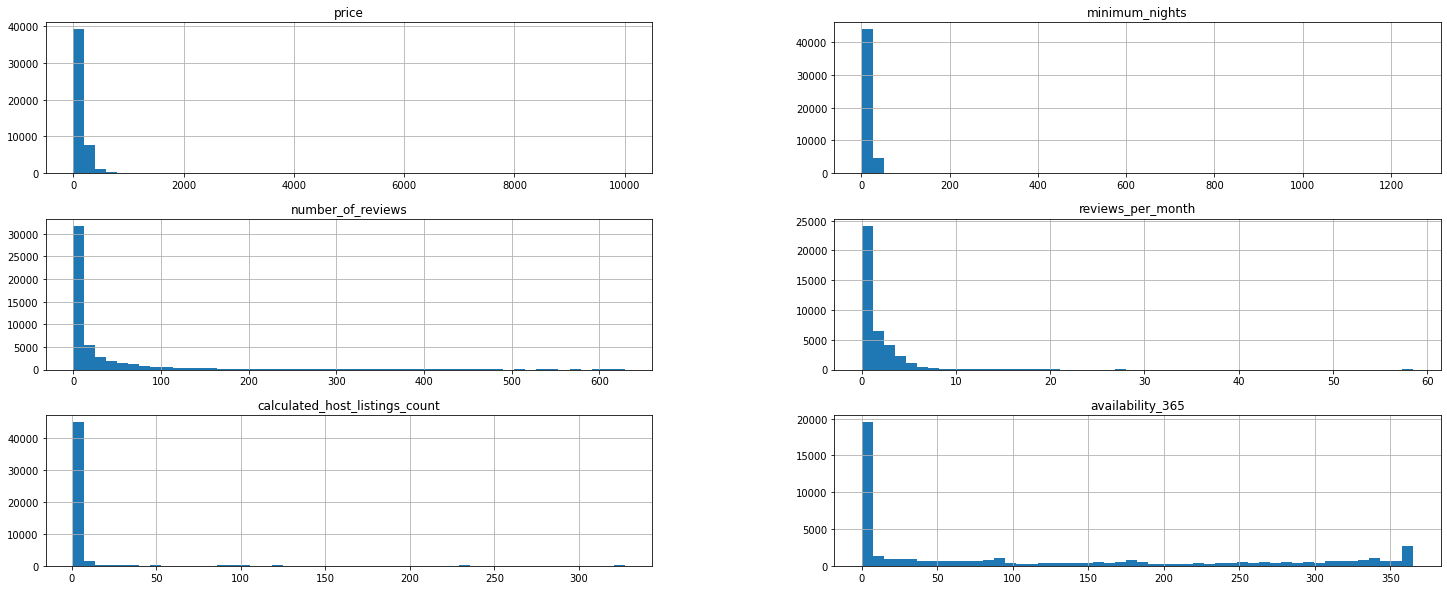

<Figure size 432x288 with 0 Axes>

In [33]:
airbnbsub.hist(bins=50, figsize=(25,10))
plt.show()
images_dir = '/content/drive/MyDrive/AlmaBetter/Cohort Nilgiri/Module 1/Capstone_Project-AirBnB_Booking_analysis/Images'
plt.savefig(f"{images_dir}/abc.png")

### Conclusion: The price, minimum_nights, reviews per months, number of reviews and the host listing count are right skewed and thus may have outliers in them.

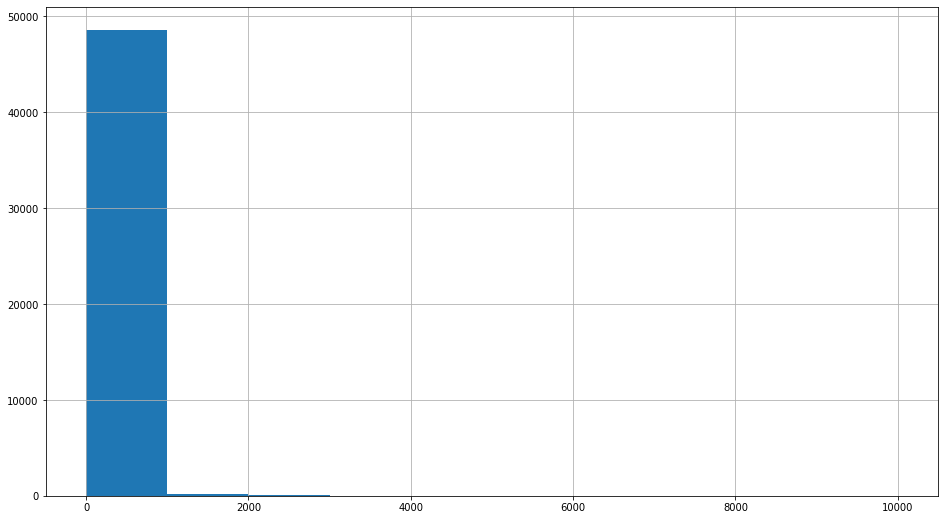

In [ ]:
airbnb_df['price'].hist(figsize =(16,9))

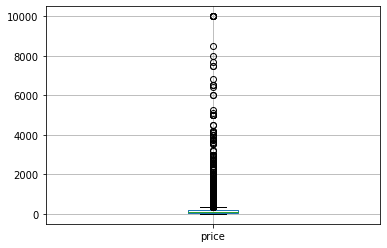

In [ ]:
airbnb_df.boxplot('price')

There is an outlier in the price 

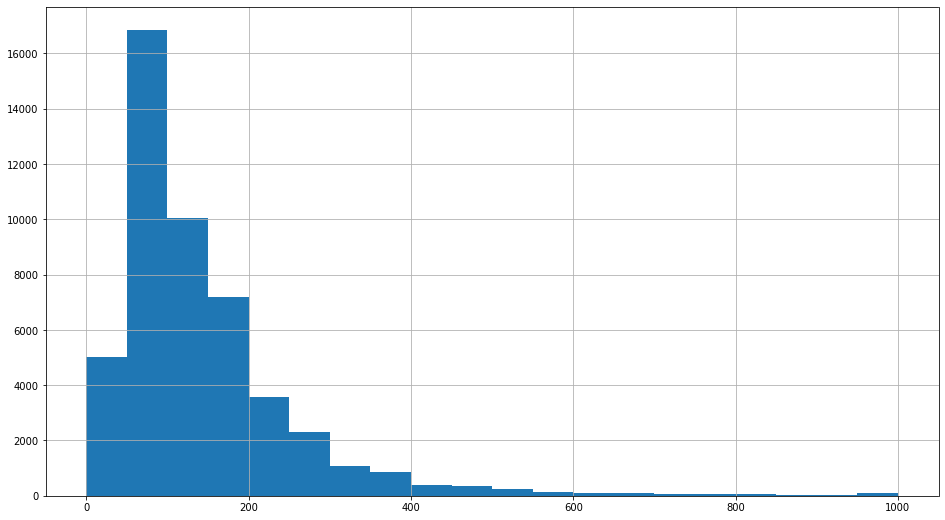

In [ ]:
## since most of airbnb price is lower than 1000, I only select price from 0-1000. 
air_temp = airbnb_df.loc[airbnb_df['price'] <=1000]
air_temp['price'].hist(figsize =(16,9),bins = 20)

### conclusion: most of the listings has an poperty price between $0-600 

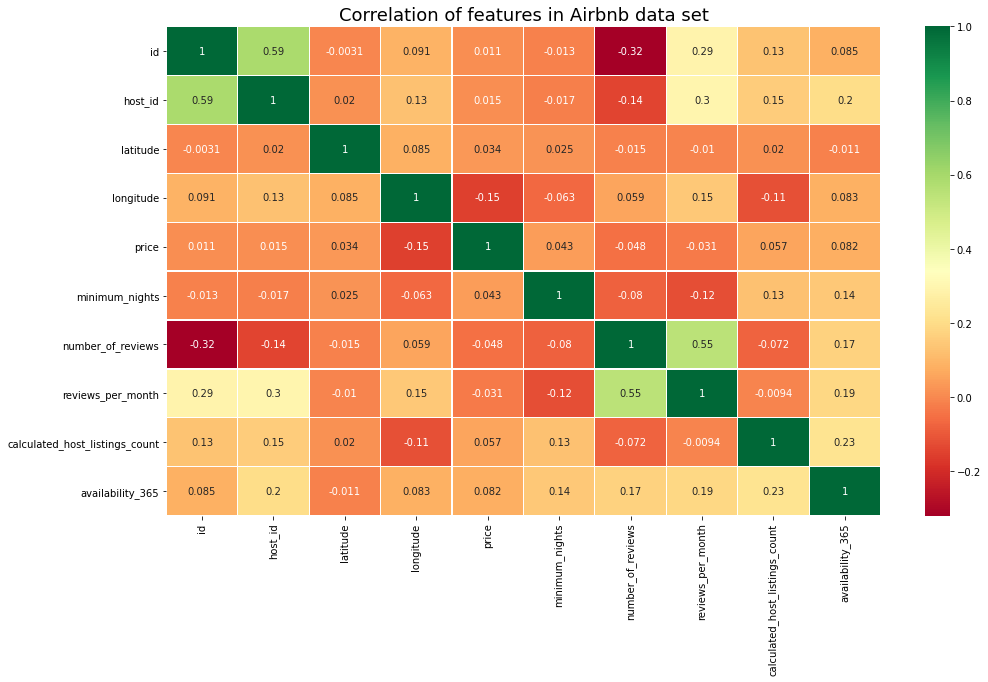

In [ ]:
## correlationship for each features
corr = airbnbsub.corr()
plt.figure(figsize= (16,9))
plt.title('Correlation of features in Airbnb data set',fontsize =18)
sns.heatmap(corr,annot = True, cmap ='RdYlGn',linewidths = 0.2, annot_kws ={'size':10})
plt.show()

### Comparining the different features of the closed lisiting to the Active listings 

In [ ]:
# closed listings
closed_property_df.head()

,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365
4,5022,Entire Apt: Spacious Studio/Loft by central park,7192,Laura,Manhattan,East Harlem,40.79851,-73.94399,Entire home/apt,80,10,9,2018-11-19,0.10,1,0
6,5121,BlissArtsSpace!,7356,Garon,Brooklyn,Bedford-Stuyvesant,40.68688,-73.95596,Private room,60,45,49,2017-10-05,0.40,1,0
8,5203,Cozy Clean Guest Room - Family Apt,7490,MaryEllen,Manhattan,Upper West Side,40.80178,-73.96723,Private room,79,2,118,2017-07-21,0.99,1,0
14,6090,West Village Nest - Superhost,11975,Alina,Manhattan,West Village,40.73530,-74.00525,Entire home/apt,120,90,27,2018-10-31,0.22,1,0
20,7801,Sweet and Spacious Brooklyn Loft,21207,Chaya,Brooklyn,Williamsburg,40.71842,-73.95718,Entire home/apt,299,3,9,2011-12-28,0.07,1,0


In [ ]:
# Active listings
available_property_df.head()

,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365
0,2539,Clean & quiet apt home by the park,2787,John,Brooklyn,Kensington,40.64749,-73.97237,Private room,149,1,9,2018-10-19,0.21,6,365
1,2595,Skylit Midtown Castle,2845,Jennifer,Manhattan,Midtown,40.75362,-73.98377,Entire home/apt,225,1,45,2019-05-21,0.38,2,355
2,3647,THE VILLAGE OF HARLEM....NEW YORK !,4632,Elisabeth,Manhattan,Harlem,40.80902,-73.94190,Private room,150,3,0,NaN,NaN,1,365
3,3831,Cozy Entire Floor of Brownstone,4869,LisaRoxanne,Brooklyn,Clinton Hill,40.68514,-73.95976,Entire home/apt,89,1,270,2019-07-05,4.64,1,194
5,5099,Large Cozy 1 BR Apartment In Midtown East,7322,Chris,Manhattan,Murray Hill,40.74767,-73.97500,Entire home/apt,200,3,74,2019-06-22,0.59,1,129


In [ ]:
# checking the datatype of the last_review_date
type(closed_property_df.last_review)

pandas.core.series.Series

In [9]:
# converting the last_review date datype to datetime formate
closed_property_df["last_review"] = closed_property_df["last_review"].astype("datetime64")
available_property_df["last_review"] = available_property_df["last_review"].astype("datetime64")

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until


In [10]:
closed_property_df.last_review.sort_values(ascending=False)

18988   2019-07-08
26791   2019-07-08
35528   2019-07-08
43699   2019-07-08
16476   2019-07-08
           ...    
48550          NaT
48731          NaT
48756          NaT
48760          NaT
48779          NaT
Name: last_review, Length: 17533, dtype: datetime64[ns]

In [ ]:
available_property_df.last_review.sort_values(ascending=False)

48852    2019-07-08
360      2019-07-08
32533    2019-07-08
43606    2019-07-08
47070    2019-07-08
            ...    
48890           NaN
48891           NaN
48892           NaN
48893           NaN
48894           NaN
Name: last_review, Length: 31362, dtype: object

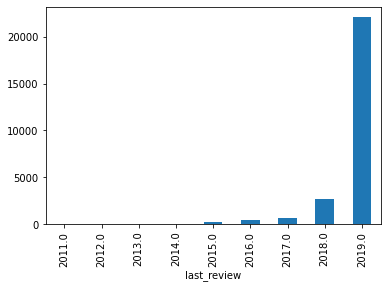

In [ ]:
# check the distribution of the frequency of reviews per years 
available_property_df["last_review"].groupby(available_property_df["last_review"].dt.year).count().plot(kind="bar")

In [ ]:
# check the frequency
available_property_df["last_review"].groupby(available_property_df["last_review"].dt.year).count()

last_review
2011.0        4
2012.0       15
2013.0       23
2014.0       52
2015.0      182
2016.0      384
2017.0      675
2018.0     2699
2019.0    22121
Name: last_review, dtype: int64

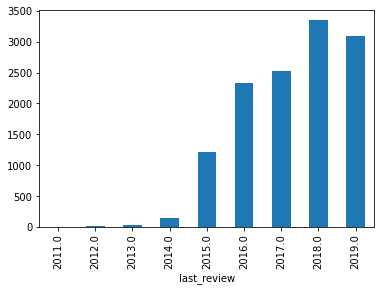

In [ ]:
closed_property_df["last_review"].groupby(closed_property_df["last_review"].dt.year).count().plot(kind="bar")

In [ ]:
# Finding the frequency values
closed_property_df["last_review"].groupby(closed_property_df["last_review"].dt.year).count()

last_review
2011.0       3
2012.0      10
2013.0      25
2014.0     147
2015.0    1211
2016.0    2323
2017.0    2530
2018.0    3351
2019.0    3088
Name: last_review, dtype: int64

#### conclusion: We could conclude that most of the properties which are currently closed are not having recent reviews. Thus our hypothesis that the properties with 0 availabality are actually closed is true.  

### Finding If Number of listings is affecting the closing of the property. 

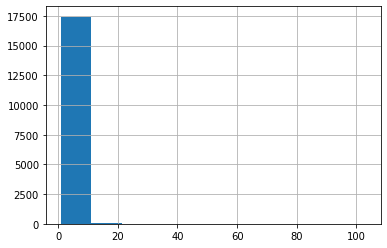

In [ ]:
closed_property_df['calculated_host_listings_count'].hist()

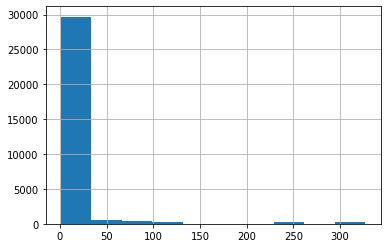

In [ ]:
available_property_df['calculated_host_listings_count'].hist()

### Text analysis of the listings names.

In [11]:
closed_property_df['name'].dropna(inplace=True)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [12]:
closed_property_df['name']

4         Entire Apt: Spacious Studio/Loft by central park
6                                          BlissArtsSpace!
8                       Cozy Clean Guest Room - Family Apt
14                           West Village Nest - Superhost
20                        Sweet and Spacious Brooklyn Loft
                               ...                        
48550      Sunny room with private entrance in shared home
48731      Sunlight charming apt. in the heart of Brooklyn
48756                              Murray Hill Masterpiece
48760    Sunnyside, Queens 15 Mins to Midtown Clean & C...
48779    Queen size bedroom in two bed apt with great l...
Name: name, Length: 17533, dtype: object

In [11]:
strr=[]
for string in closed_property_df['name']:
  if (type(string) == str):
    strr.append(string)

In [12]:
text=' '.join(strr)

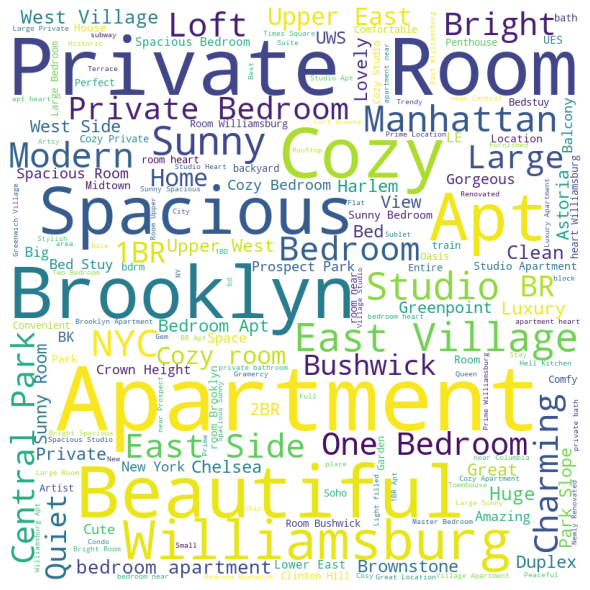

In [13]:
from wordcloud import WordCloud, STOPWORDS 
stopwords = set(STOPWORDS) 

wordcloud = WordCloud(width = 800, height = 800, 
                background_color ='white', 
                stopwords = stopwords, 
                min_font_size = 10).generate(text) 
  
# plot the WordCloud image                        
plt.figure(figsize = (8, 8), facecolor = None) 
plt.imshow(wordcloud) 
plt.axis("off") 
plt.tight_layout(pad = 0) 
  
plt.show() 

In [14]:
strr=[]
for string in available_property_df['name']:
  if (type(string) == str):
    strr.append(string)

In [15]:
text=' '.join(strr)

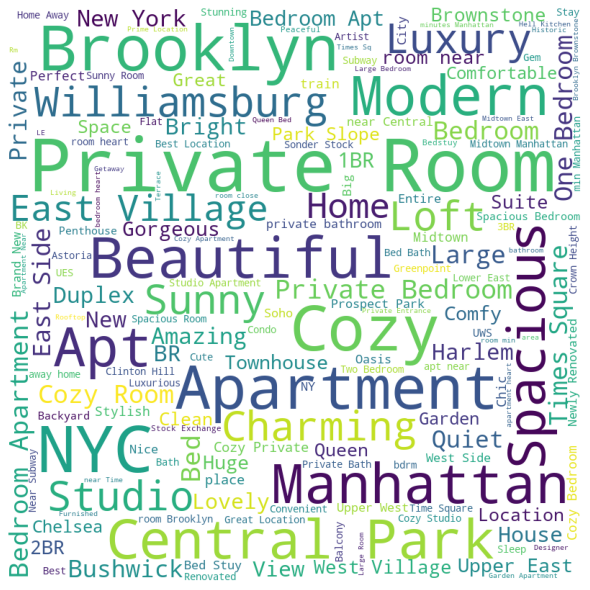

In [16]:
from wordcloud import WordCloud, STOPWORDS 
stopwords = set(STOPWORDS) 

wordcloud = WordCloud(width = 800, height = 800, 
                background_color ='white', 
                stopwords = stopwords, 
                min_font_size = 10).generate(text) 
  
# plot the WordCloud image                        
plt.figure(figsize = (8, 8), facecolor = None) 
plt.imshow(wordcloud) 
plt.axis("off") 
plt.tight_layout(pad = 0) 
  
plt.show() 